In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import your custom classes
from eda_skewed import DataFrameTransform, Plotter


In [3]:
# Load your DataFrame 
df = pd.read_csv('loan_payments_data.xlsx')

In [4]:
# Assuming df is your DataFrame
transformer = DataFrameTransform(df)
plotter = Plotter(df)

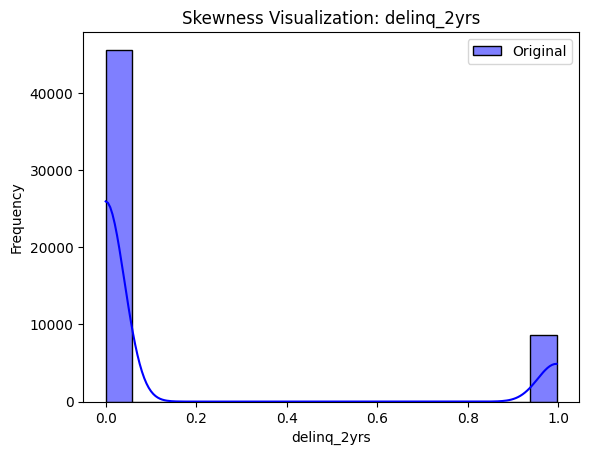

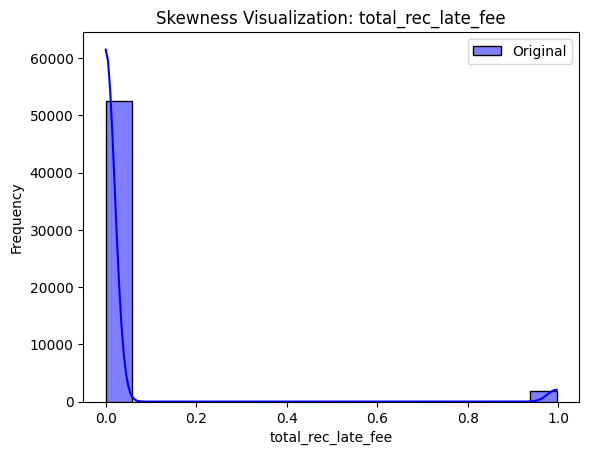

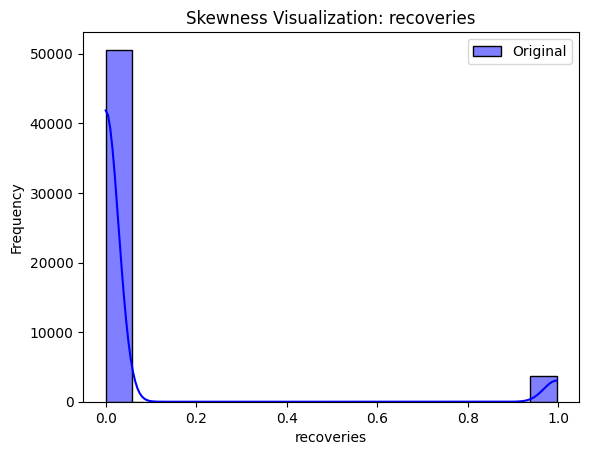

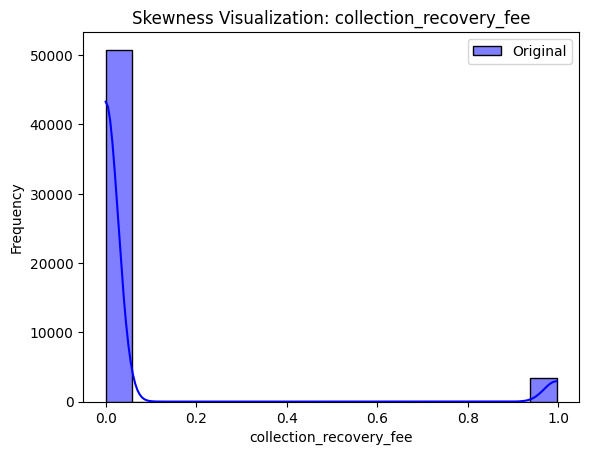

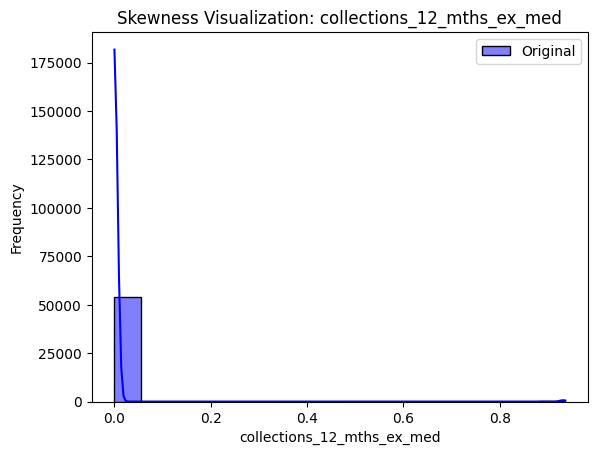

In [5]:
# Identify and visualize skewed columns
skewed_columns = transformer.identify_skewed_columns()
plotter.visualize_skewness(skewed_columns)

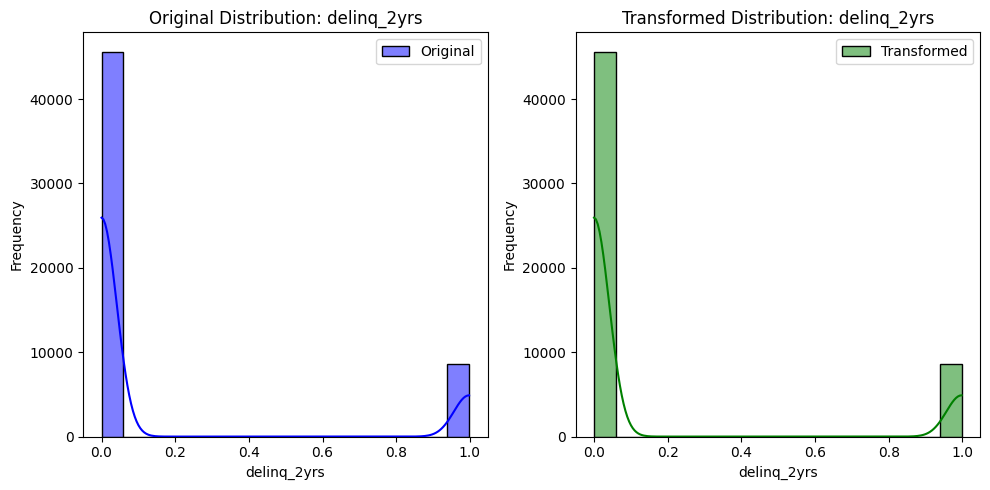

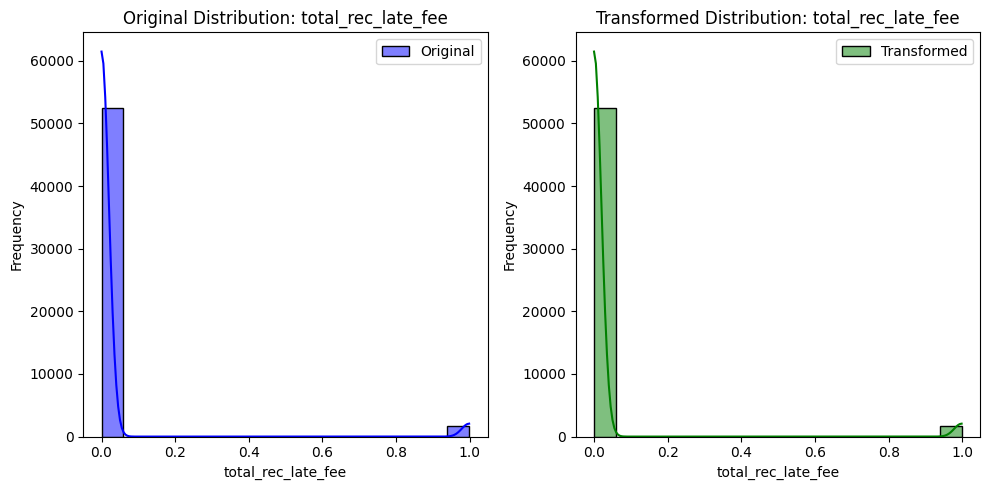

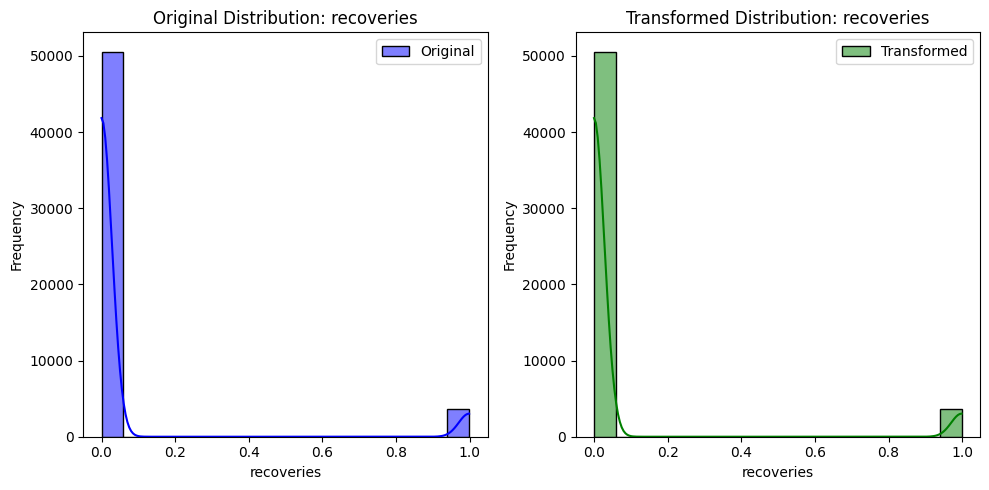

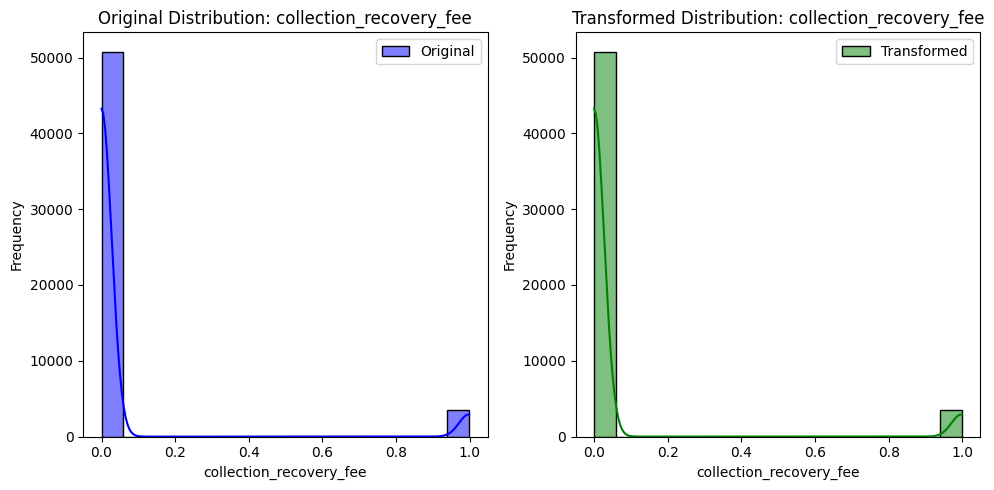

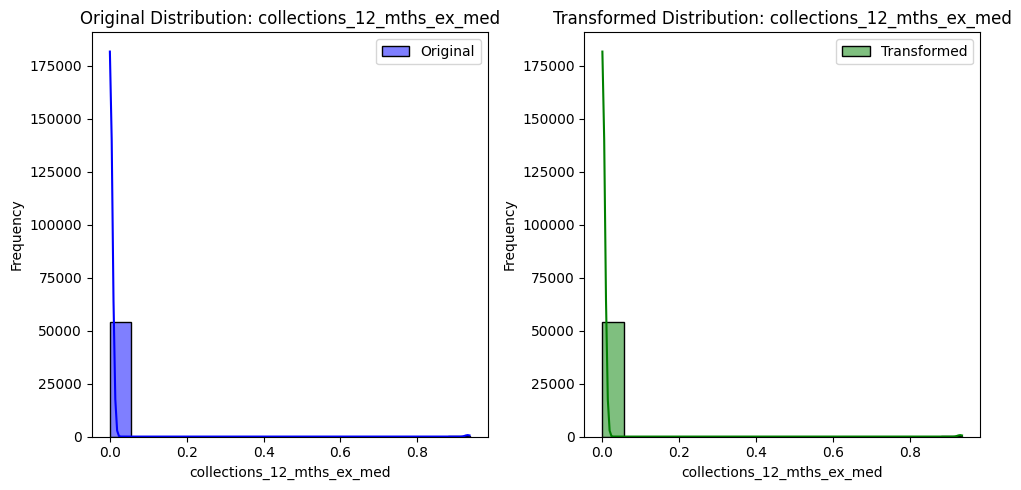

In [6]:
# Reduce skewness and visualize transformations
df_transformed = transformer.reduce_skewness()
for col in skewed_columns:
    plotter.visualize_transformation(col, df[col], df_transformed[col])


In [7]:
# Save a copy of the transformed DataFrame
transformer.save_copy('loan_payments_data.xlsx')

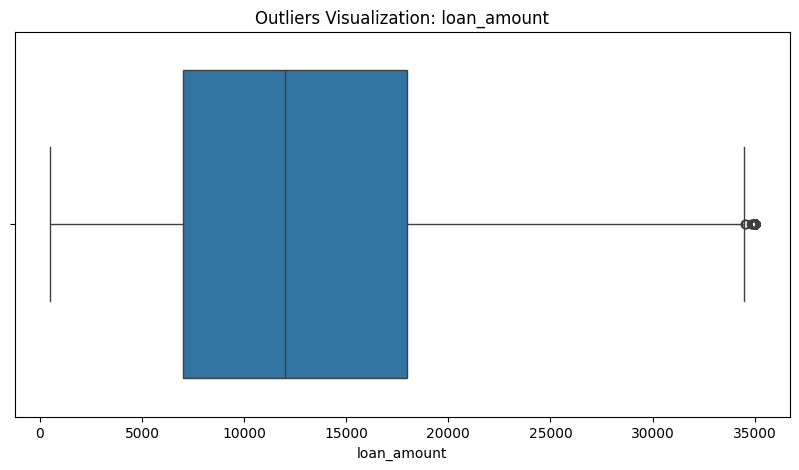

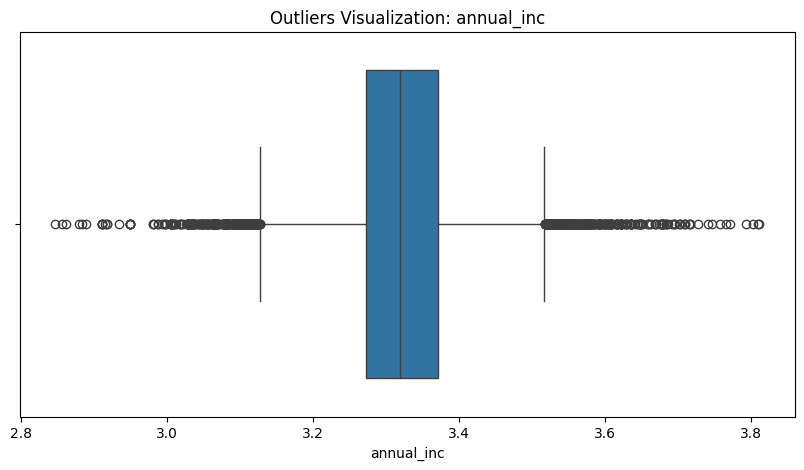

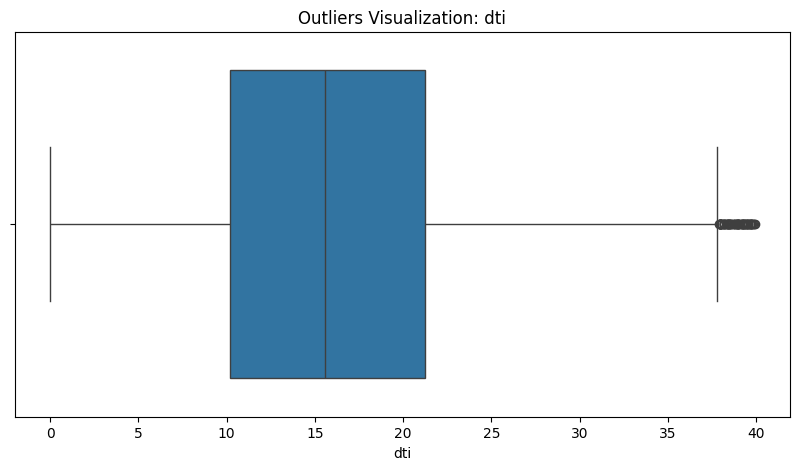

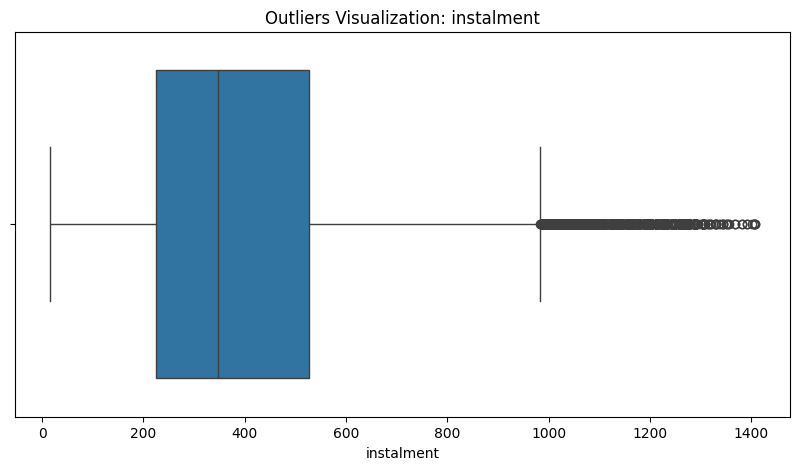

In [8]:
outliers_columns = ['loan_amount', 'annual_inc', 'dti', 'instalment']
plotter.visualize_outliers(outliers_columns)

In [9]:
# Remove outliers and visualize the transformed data
df_no_outliers = transformer.remove_outliers(outliers_columns)

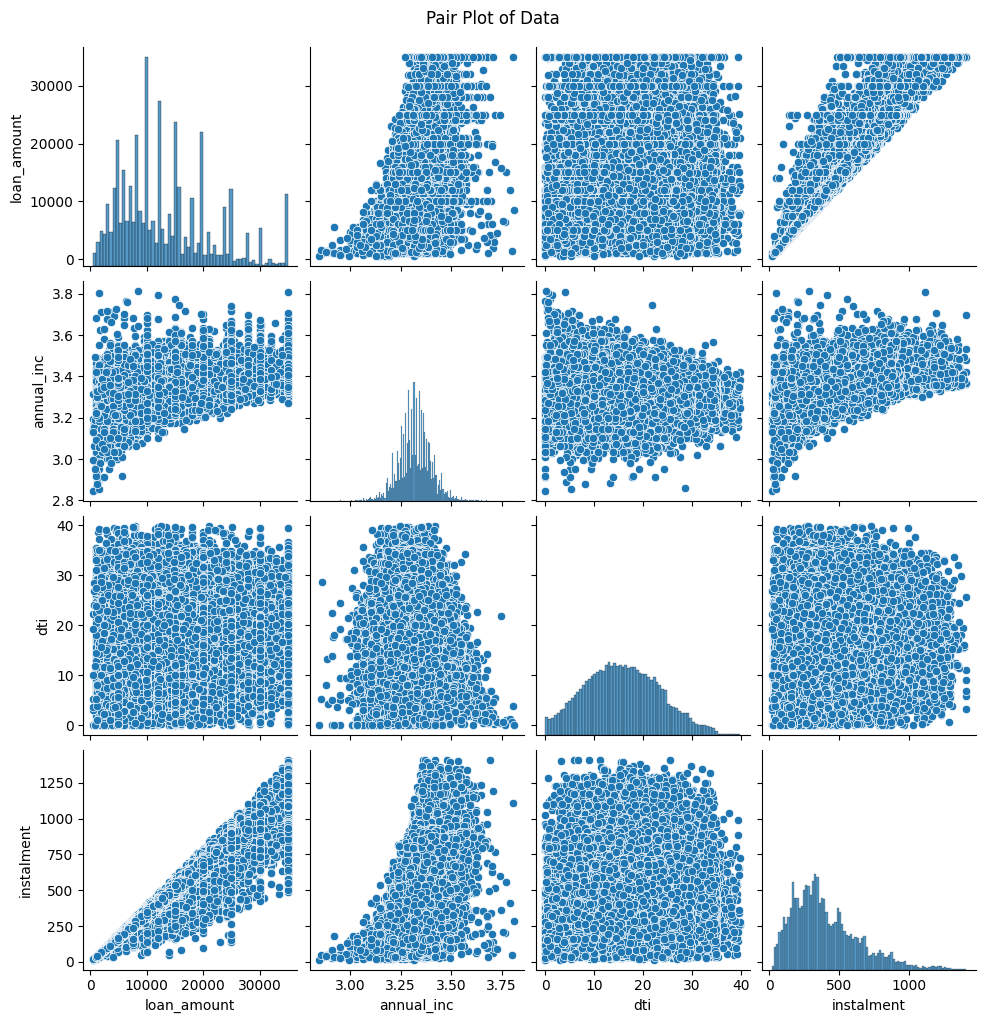

In [11]:
# Visualize the data after removing outliers
plotter.visualize_data(columns=outliers_columns)

In [16]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])


In [17]:
# Check for any remaining non-numeric columns and drop them
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
numeric_columns = numeric_columns.drop(columns=non_numeric_columns, errors='ignore')

In [18]:
# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

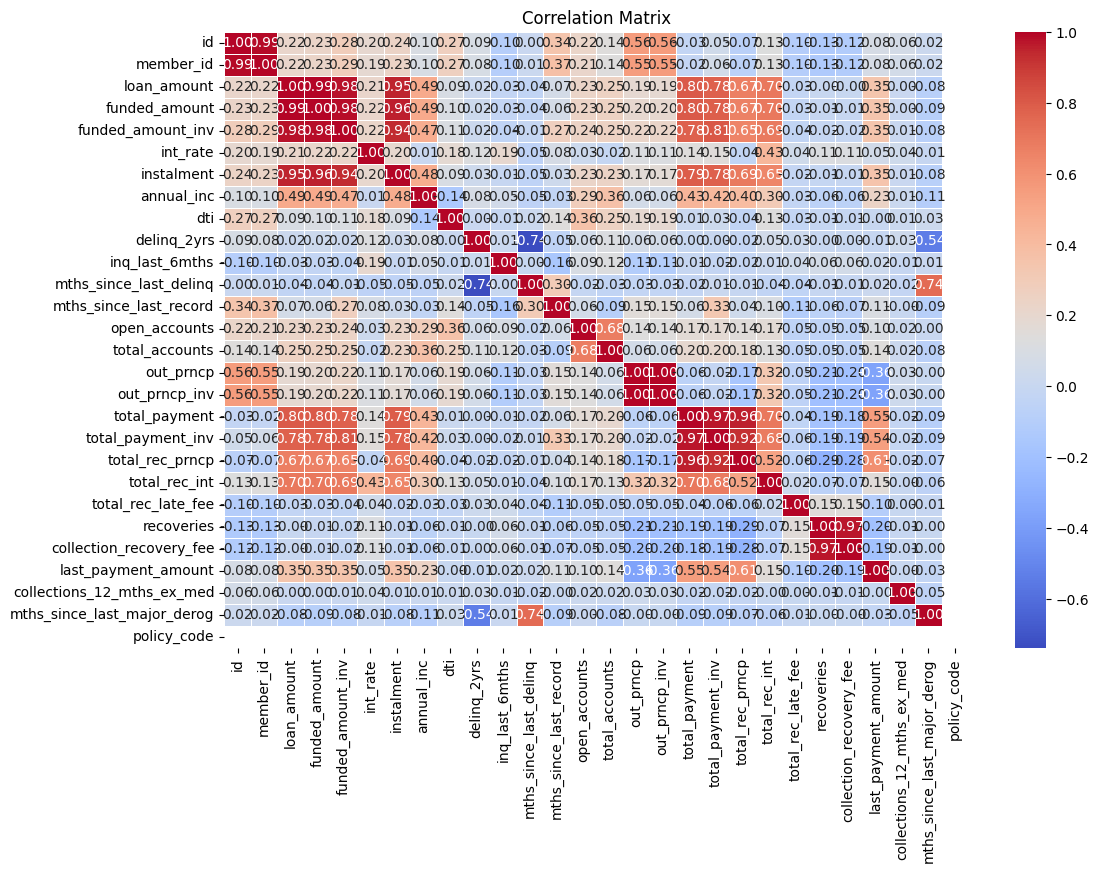

In [21]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [22]:
threshold = 0.7
highly_correlated_columns = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_columns.add(colname)

highly_correlated_columns = list(highly_correlated_columns)

In [23]:
df_no_high_corr = df.drop(columns=highly_correlated_columns)

In [33]:
# Calculate the total amount funded and the total recovered amount
total_funded = df['funded_amount'].sum()
total_recovered = df['recoveries'].sum() + df['collection_recovery_fee'].sum()

# Calculate the percentage of recovered amount against the total funded amount
recovery_percentage = (total_recovered / total_funded) * 100
# Print the result
print(f"Percentage of loans recovered: {recovery_percentage:.2f}%")

Percentage of loans recovered: 0.00%


In [37]:
#check the unique values in the 'recoveries' column to understand the distribution of loan statuses
unique_recoveries_values = df['recoveries'].unique()
print("Unique Recoveries Values:", unique_recoveries_values)

Unique Recoveries Values: [0.         0.99817839 0.99818833 ... 0.99814541 0.99805182 0.9981335 ]


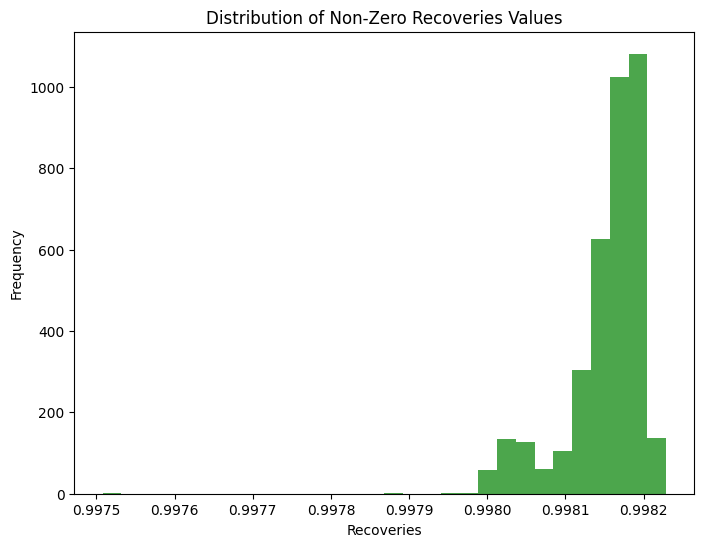

In [40]:
# Plotting the distribution of non-zero recoveries values
non_zero_recoveries = df[df['recoveries'] > 0]
plt.figure(figsize=(8, 6))
plt.hist(non_zero_recoveries['recoveries'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Non-Zero Recoveries Values')
plt.xlabel('Recoveries')
plt.ylabel('Frequency')
plt.show()

In [42]:
# Assuming loan_term is a column indicating the term of the loan
# Calculate the total amount expected to be recovered within 6 months
total_recovered_6_months = df[df['term'] == '36 months']['total_rec_prncp'].sum()

# Calculate the percentage of the total amount recovered within 6 months
recovery_percentage_6_months = (total_recovered_6_months / total_funded) * 100

# Print the result
print(f"Percentage of loans recovered within 6 months: {recovery_percentage_6_months:.2f}%")

Percentage of loans recovered within 6 months: 0.47%
